# 1.数据生成

In [1]:
import numpy as np

## 1.1生成变量x

In [2]:
totnub = 1000
train_nub = int(totnub * 0.6) #前n个作为训练数据

np.random.seed(0)
X1 = np.random.normal(size=(totnub,1),scale=1)
X2 = np.random.normal(size=(totnub,1),scale=1)
X1.shape,X2.shape

((1000, 1), (1000, 1))

In [3]:
train_nub

600

## 1.2生成因变量    $ Y = X_1 + 2 X_2 +3 $

In [4]:
p=np.random.random(totnub)#产生噪声
p.reshape(totnub,1)
p.shape

(1000,)

In [5]:
Y = X1[:,0] + 2 * X2[:,0] + p +2
Y = Y.reshape(totnub,1)
Y.shape

(1000, 1)

In [6]:
All_data = np.concatenate((X1,X2,Y),axis = 1)
All_data.shape

(1000, 3)

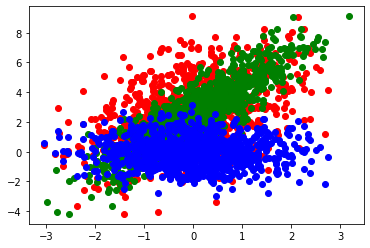

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.scatter(X1,Y,c='r')
plt.scatter(X2,Y,c='g')
plt.scatter(X1,X2,c='b')

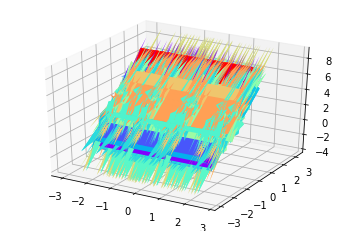

In [8]:
fig = plt.figure()  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据
X1,X2 = np.meshgrid(X1,X2)

#作图
ax3.plot_surface(X1,X2,Y,cmap='rainbow')
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow)   #等高线图，要设置offset，为Z的最小值
plt.show()

## 1.2 训练数据vs. 训练数据

In [9]:
np.random.shuffle(All_data)#打乱数据
train_data = All_data[:train_nub,:]
test_data = All_data[train_nub:,:]

In [10]:
train_data.shape,test_data.shape

((600, 3), (400, 3))

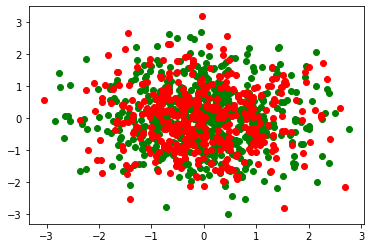

In [11]:
plt.scatter(train_data[:,0],train_data[:,1],c='g')
plt.scatter(test_data[:,0],test_data[:,1],c='r')

$ Y= X_1 + 2 X_2 + 3 $
 
 

# 2.回归

In [12]:
x = np.concatenate(((train_data[:,0]).reshape(train_nub,1),(train_data[:,1]).reshape(train_nub,1),np.ones((train_nub,1))) ,axis=1)
y = (train_data[:,2]).reshape(train_nub,1)
x.shape,y.shape

((600, 3), (600, 1))

In [13]:
x_hat = x.T
x_hat.shape

(3, 600)

In [14]:
## 超参数
lr = 0.001

In [15]:
## 定义w
w = np.random.normal(size=2)
b = np.random.rand()

In [16]:
w_hat = np.concatenate((w,np.array([b])))
w_hat.reshape(1,3)

array([[-0.63094934,  0.81268353,  0.11239978]])

In [17]:
##主函数
w1_list = []
w2_list = []
b_list = []
loss_list = []
num = 0

while True:
    num = num + 1
    loss = 0.5 * np.dot((y.T - np.dot(w_hat,x_hat)),(y.T - np.dot(w_hat,x_hat)).T)**2
    w_hat = w_hat + lr * np.dot((y.T - np.dot(w_hat,x_hat)),x_hat.T)
    w1_list.append(w_hat[:,0])
    w2_list.append(w_hat[:,1])
    b_list.append(w_hat[:,2])
    loss_list.append(loss)
    if num > 200 or loss < 1e-3:
        break
num

201

In [18]:
loss_list[-1],w1_list[-1],w2_list[-1],b_list[-1]

(array([[1215.84188473]]),
 array([0.98907125]),
 array([2.00727315]),
 array([2.51115083]))

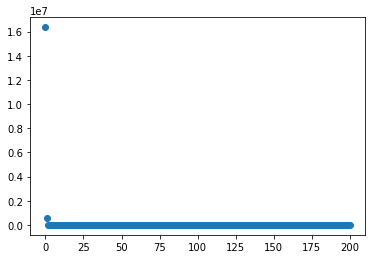

In [19]:
plt.scatter(range(len(w1_list)),loss_list)

In [1]:
plt.plot(w1_list,c='r')
plt.plot(w2_list,c='b')
plt.plot(b_list,c='g')

NameError: name 'plt' is not defined

# 最小二乘法 

In [2]:
WW = np.dot(np.linalg.inv(np.dot(x_hat,x_hat.T)),np.dot(x_hat,y))
WW

NameError: name 'np' is not defined

In [ ]:
x_hat = np.concatenate((x**3,x**2,x,np.ones((1,train_nub))),axis=0)
x_hat = x_hat.reshape(4,train_nub)
x_hat.shape